# 時系列データ

# 日経経平均株価の時系列データ解析

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas.core import datetools
import statsmodels.api as sm
%matplotlib inline

df = pd.read_csv('./csv/nikkei_stock_average_monthly_jp.csv', encoding='shift_jis')
df = df.iloc[:-1, 0:2] # データ日付と終値だけを取得(始値や安値などは除く)
df.head() # 先頭から5件取得

,データ日付,終値
0,2000/01/01,19539.70
1,2000/02/01,19959.52
2,2000/03/01,20337.32
3,2000/04/01,17973.70
4,2000/05/01,16332.45


0    2000/01/01
1    2000/02/01
2    2000/03/01
3    2000/04/01
4    2000/05/01
Name: date, dtype: object

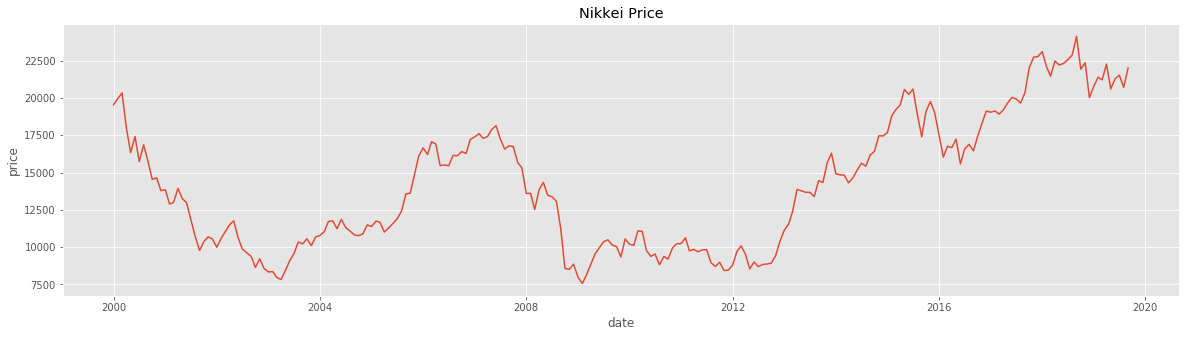

In [3]:
"""

date = pd.to_datetime(date) の行部分にて、
環境によってはワーニングエラーが出る場合があります。

その場合、下記の２行を先頭に追加し、実行して見てください。

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

"""
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df.columns = ['date', 'price']

date = np.array(df['date'])
price = np.array(df['price'])

date = pd.to_datetime(date) # この行で環境によってはワーニングエラーが出る場合があります。

plt.figure(figsize=[20, 5]) # widthが20でheightが5
plt.style.use('ggplot')

plt.plot(date, price)
plt.title('Nikkei Price') # titleにNikkei Priceとつける
plt.xlabel('date') # x軸のラベルにdateとつける
plt.ylabel('price')# y軸のラベルにpriceとつける

df['date'].head()

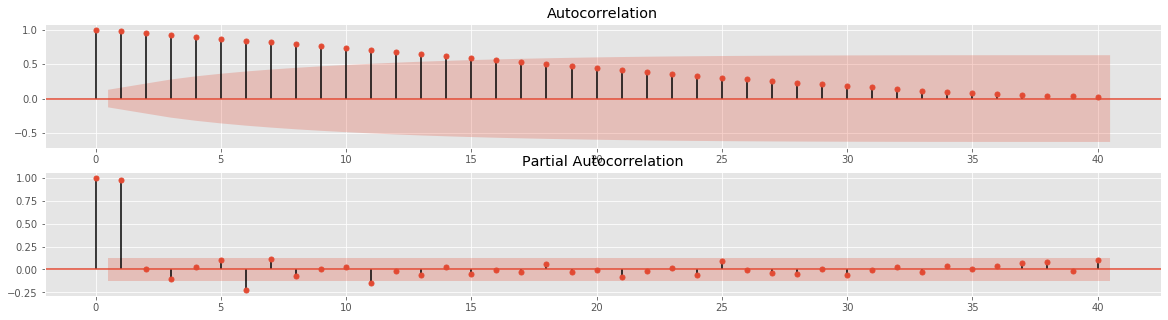

In [5]:
price = df.set_index('date')

# 自己相関
price_acf = sm.tsa.stattools.acf(price, nlags=40)
# 偏自己相関
price_pacf = sm.tsa.stattools.pacf(price, nlags=40, method='ols')

#  自己相関のグラフ（コレログラム）
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(211)

# ラグが40(lags=40)までの自己相関
fig = sm.graphics.tsa.plot_acf(price, lags=40, ax=ax1)
ax2 = fig.add_subplot(212)

# ラグが40(lags=40)までの編自己相関
fig = sm.graphics.tsa.plot_pacf(price, lags=40, ax=ax2)

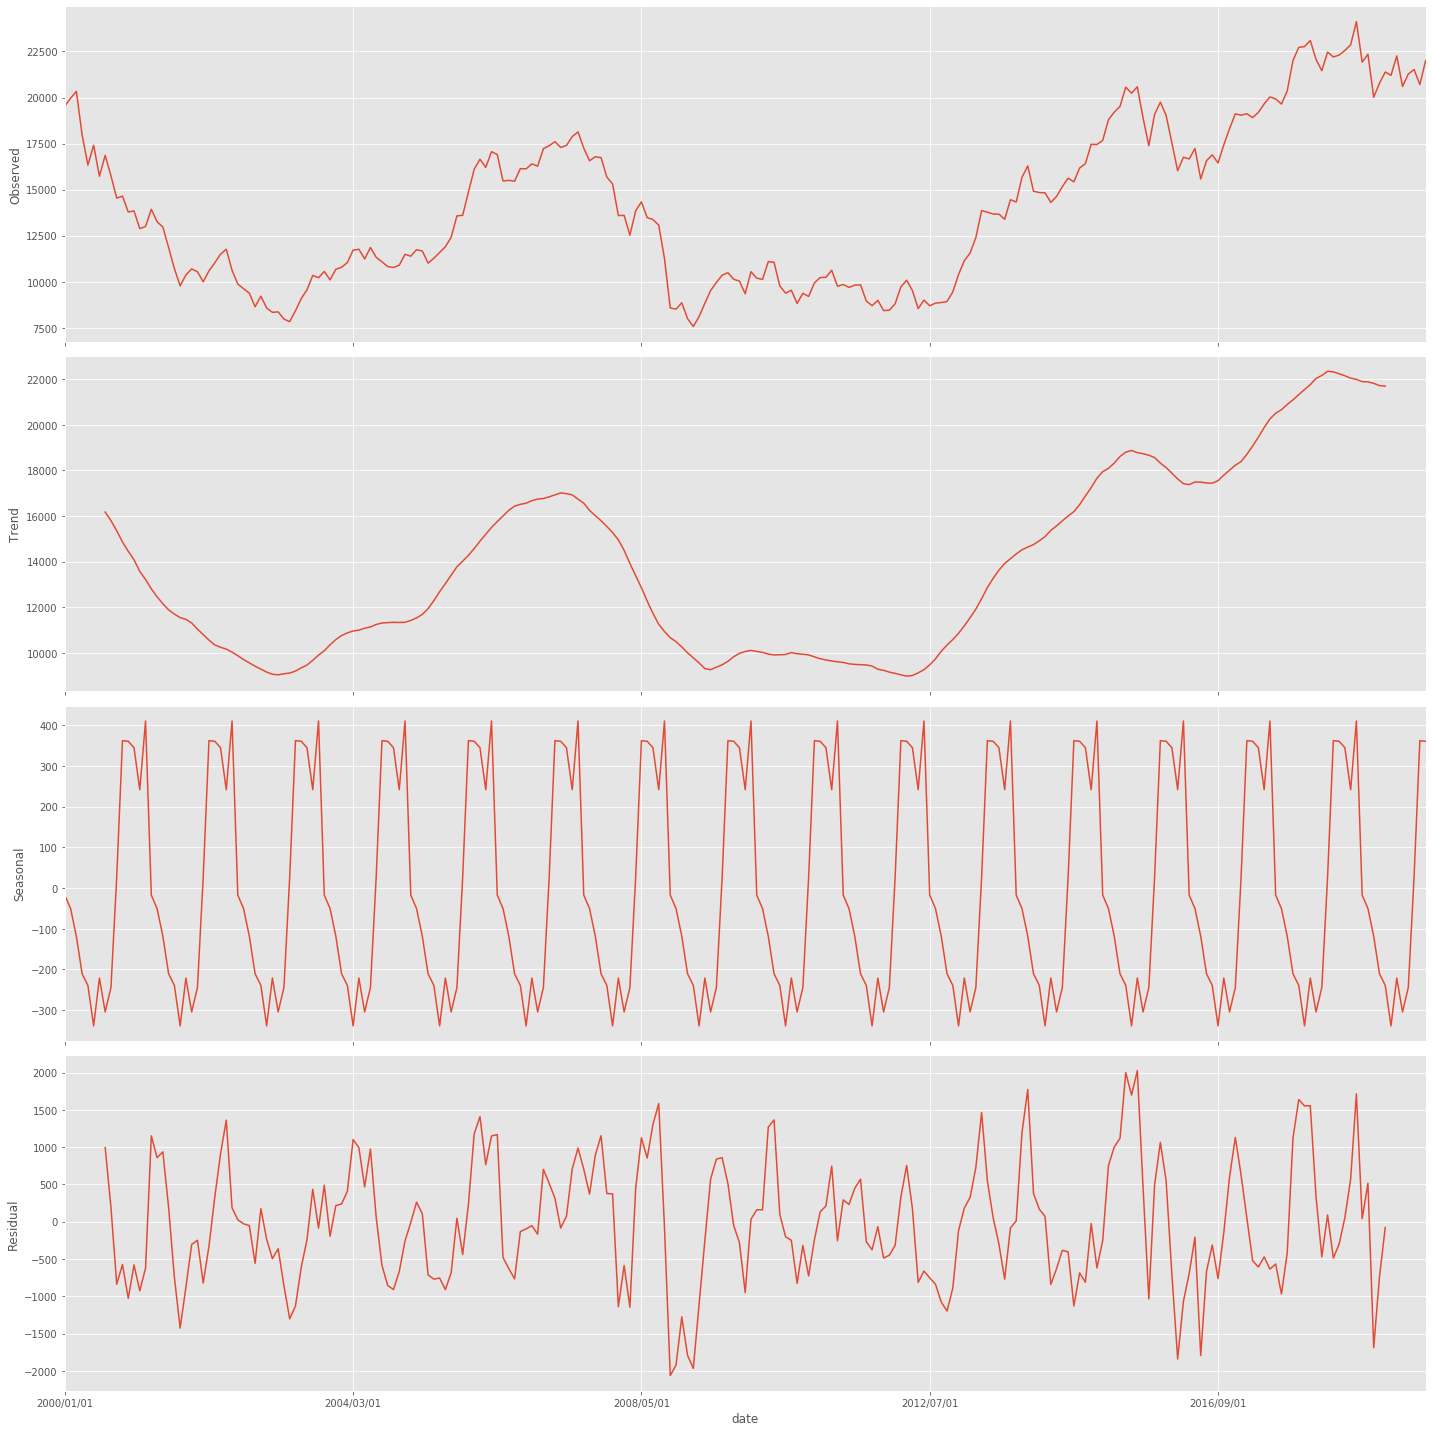

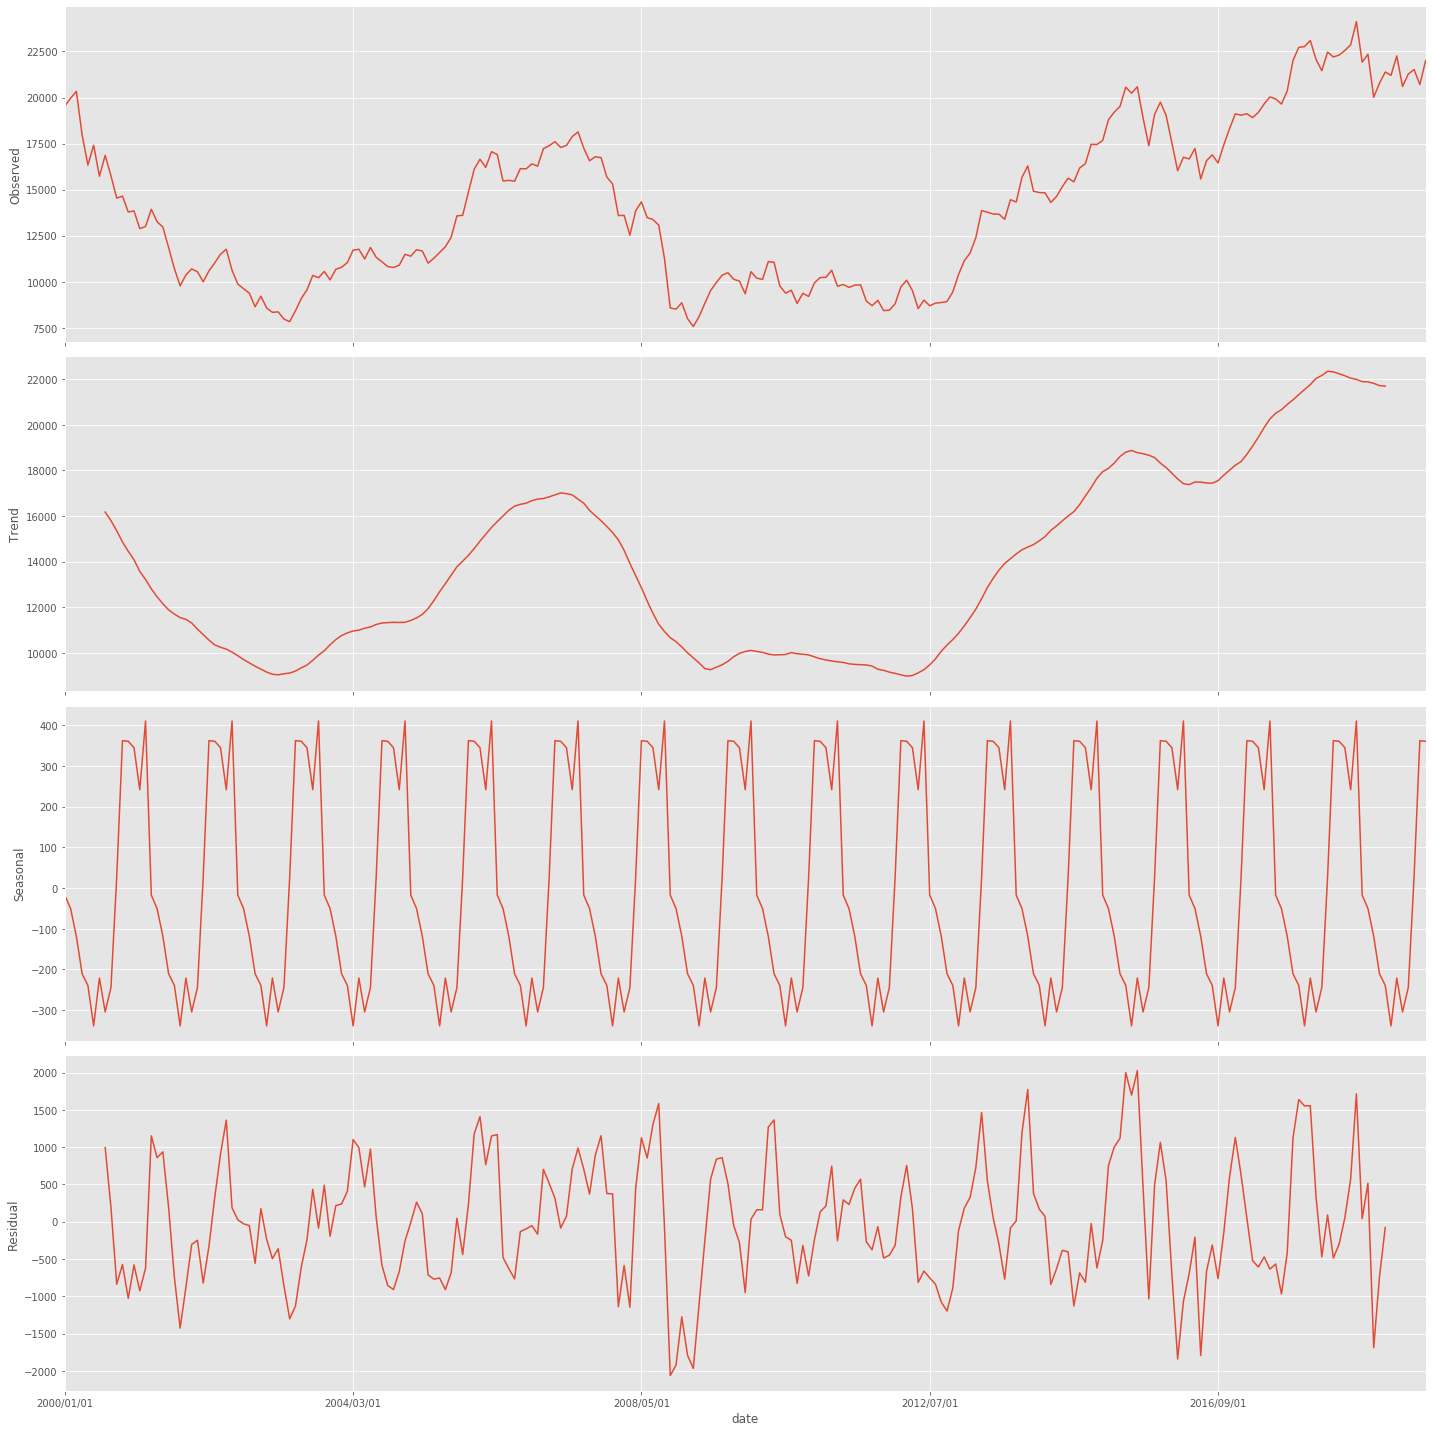

In [6]:
#  グラフのサイズを変更
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,20

seasonal = sm.tsa.seasonal_decompose(price, freq=15)
seasonal.plot()